## Project Name - **Temperature Forecast Project**


##### Name - Aman Mulla.
##### Batch - DS2307



# **Project Summary -**

This project aims to enhance the accuracy of next-day maximum and minimum air temperature forecasts for Seoul, South Korea, utilizing data from 2013 to 2017. The dataset comprises diverse inputs, including present-day temperature, LDAPS model forecasts, geographic variables, and weather station specifics. With 25 weather stations and attributes like humidity, wind speed, cloud cover, and solar radiation, this dataset offers a comprehensive scope for modeling.

The objective involves developing distinct predictive models for next-day minimum and maximum temperatures. Leveraging machine learning algorithms, these models will utilize historical data for training and validate their performance against hindcast data from 2015 to 2017.

Ultimately, this project seeks to create robust models capable of correcting biases in temperature forecasts, aiding the LDAPS model operated by the Korea Meteorological Administration, thereby enhancing the reliability of future temperature predictions for Seoul.

**Attribute Information**:

1. **Station**: Weather station number (1 to 25)
2. **Date**: Present day (2013-06-30 to 2017-08-30)
3. **Present_Tmax**: Present-day maximum air temperature (°C)
4. **Present_Tmin**: Present-day minimum air temperature (°C)
5. **LDAPS_RHmin**: LDAPS model forecast of next-day minimum relative humidity (%)
6. **LDAPS_RHmax**: LDAPS model forecast of next-day maximum relative humidity (%)
7. **LDAPS_Tmax_lapse**: LDAPS model forecast of next-day maximum air temperature with lapse rate (°C)
8. **LDAPS_Tmin_lapse**: LDAPS model forecast of next-day minimum air temperature with lapse rate (°C)
9. **LDAPS_WS**: LDAPS model forecast of next-day average wind speed (m/s)
10. **LDAPS_LH**: LDAPS model forecast of next-day average latent heat flux (W/m2)
11. **LDAPS_CC1-4**: LDAPS model forecast of next-day split average cloud cover (%)
12. **LDAPS_PPT1-4**: LDAPS model forecast of next-day split average precipitation (%)
13. **Latitude (lat)**: Latitude (°)
14. **Longitude (lon)**: Longitude (°)
15. **DEM**: Elevation (m)
16. **Slope**: Slope (°)
17. **Solar radiation**: Daily incoming solar radiation (wh/m2)
18. **Next_Tmax**: Next-day maximum air temperature (°C)
19. **Next_Tmin**: Next-day minimum air temperature (°C)

# **Problem Statement**

**The task is to create predictive models for Seoul, South Korea's next-day maximum and minimum temperatures using diverse weather data spanning 2013 to 2017. Leveraging inputs like present-day temperatures, LDAPS model forecasts, geographic variables, and weather station specifics, the aim is to correct biases in temperature predictions generated by the LDAPS model of the Korea Meteorological Administration. With 25 weather stations providing attributes such as humidity, wind speed, cloud cover, and solar radiation, the challenge involves developing separate models to accurately forecast next-day maximum and minimum temperatures. These models will utilize historical data for training and validate their predictions against 2015-2017 data. The overarching goal is to enhance the precision of temperature forecasts, aiding meteorological operations and ensuring more reliable predictions for Seoul's future temperatures**

## Knowing data and variable in dataset

In [1]:
# Importing Necessary Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

In [2]:
temp_data = pd.read_csv('/content/drive/MyDrive/DataSets/temperature.csv')

temp_data.head()

station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0      1.0  30-06-2013          28.7          21.4    58.255688    91.116364   
1      2.0  30-06-2013          31.9          21.6    52.263397    90.604721   
2      3.0  30-06-2013          31.6          23.3    48.690479    83.973587   
3      4.0  30-06-2013          32.0          23.4    58.239788    96.483688   
4      5.0  30-06-2013          31.4          21.9    56.174095    90.155128   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  LDAPS_CC1  \
0         28.074101         23.006936  6.818887   69.451805   0.233947   
1         29.850689         24.035009  5.691890   51.937448   0.225508   
2         30.091292         24.565633  6.138224   20.573050   0.209344   
3         29.704629         23.326177  5.650050   65.727144   0.216372   
4         29.113934         23.486480  5.735004  107.965535   0.151407   

   LDAPS_CC2  LDAPS_CC3  LDAPS_CC4  LDAPS_PPT1  LDAPS_PPT2  LDAPS_PPT3  \
0   0.203896   0.161697   0.130928         0.0         0.0         0.0   
1   0.251771   0.159444   0.127727         0.0         0.0         0.0   
2   0.257469   0.204091   0.142125         0.0         0.0         0.0   
3   0.226002   0.161157   0.134249         0.0         0.0         0.0   
4   0.249995   0.178892   0.170021         0.0         0.0         0.0   

   LDAPS_PPT4      lat      lon       DEM   Slope  Solar radiation  Next_Tmax  \
0         0.0  37.6046  126.991  212.3350  2.7850      5992.895996       29.1   
1         0.0  37.6046  127.032   44.7624  0.5141      5869.312500       30.5   
2         0.0  37.5776  127.058   33.3068  0.2661      5863.555664       31.1   
3         0.0  37.6450  127.022   45.7160  2.5348      5856.964844       31.7   
4         0.0  37.5507  127.135   35.0380  0.5055      5859.552246       31.2   

   Next_Tmin  
0       21.2  
1       22.5  
2       23.9  
3       24.3  
4       22.5

**To avoide type error will rename for some of column name.**

In [3]:
temp_data.columns

Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

In [4]:
# To avoide type error, renamimg for column name.

temp_data.rename(columns={'Solar radiation':'Solar_radiation'},inplace=True)

# Also for further analaysis will split 'Date' column in 'Year' and 'Month'

temp_data['Year'] = pd.DatetimeIndex(temp_data['Date']).year
temp_data['Month'] = pd.DatetimeIndex(temp_data['Date']).month

<ipython-input-4-3925886e1069>:7: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  temp_data['Year'] = pd.DatetimeIndex(temp_data['Date']).year
<ipython-input-4-3925886e1069>:8: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  temp_data['Month'] = pd.DatetimeIndex(temp_data['Date']).month


In [5]:
temp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


In [6]:
# Will check for description of dataset

temp_data.describe()

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
count  7750.000000   7682.000000   7682.000000  7677.000000  7677.000000   
mean     13.000000     29.768211     23.225059    56.759372    88.374804   
std       7.211568      2.969999      2.413961    14.668111     7.192004   
min       1.000000     20.000000     11.300000    19.794666    58.936283   
25%       7.000000     27.800000     21.700000    45.963543    84.222862   
50%      13.000000     29.900000     23.400000    55.039024    89.793480   
75%      19.000000     32.000000     24.900000    67.190056    93.743629   
max      25.000000     37.600000     29.900000    98.524734   100.000153   

       LDAPS_Tmax_lapse  LDAPS_Tmin_lapse     LDAPS_WS     LDAPS_LH  \
count       7677.000000       7677.000000  7677.000000  7677.000000   
mean          29.613447         23.512589     7.097875    62.505019   
std            2.947191          2.345347     2.183836    33.730589   
min           17.624954         14.272646     2.882580   -13.603212   
25%           27.673499         22.089739     5.678705    37.266753   
50%           29.703426         23.760199     6.547470    56.865482   
75%           31.710450         25.152909     8.032276    84.223616   
max           38.542255         29.619342    21.857621   213.414006   

         LDAPS_CC1    LDAPS_CC2    LDAPS_CC3    LDAPS_CC4   LDAPS_PPT1  \
count  7677.000000  7677.000000  7677.000000  7677.000000  7677.000000   
mean      0.368774     0.356080     0.318404     0.299191     0.591995   
std       0.262458     0.258061     0.250362     0.254348     1.945768   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.146654     0.140615     0.101388     0.081532     0.000000   
50%       0.315697     0.312421     0.262555     0.227664     0.000000   
75%       0.575489     0.558694     0.496703     0.499489     0.052525   
max       0.967277     0.968353     0.983789     0.974710    23.701544   

        LDAPS_PPT2   LDAPS_PPT3   LDAPS_PPT4          lat          lon  \
count  7677.000000  7677.000000  7677.000000  7752.000000  7752.000000   
mean      0.485003     0.278200     0.269407    37.544722   126.991397   
std       1.762807     1.161809     1.206214     0.050352     0.079435   
min       0.000000     0.000000     0.000000    37.456200   126.826000   
25%       0.000000     0.000000     0.000000    37.510200   126.937000   
50%       0.000000     0.000000     0.000000    37.550700   126.995000   
75%       0.018364     0.007896     0.000041    37.577600   127.042000   
max      21.621661    15.841235    16.655469    37.645000   127.135000   

               DEM        Slope  Solar_radiation    Next_Tmax    Next_Tmin  \
count  7752.000000  7752.000000      7752.000000  7725.000000  7725.000000   
mean     61.867972     1.257048      5341.502803    30.274887    22.932220   
std      54.279780     1.370444       429.158867     3.128010     2.487613   
min      12.370000     0.098475      4329.520508    17.400000    11.300000   
25%      28.700000     0.271300      4999.018555    28.200000    21.300000   
50%      45.716000     0.618000      5436.345215    30.500000    23.100000   
75%      59.832400     1.767800      5728.316406    32.600000    24.600000   
max     212.335000     5.178230      5992.895996    38.900000    29.800000   

              Year        Month  
count  7750.000000  7750.000000  
mean   2015.000000     7.080645  
std       1.414305     2.238364  
min    2013.000000     1.000000  
25%    2014.000000     7.000000  
50%    2015.000000     7.000000  
75%    2016.000000     8.000000  
max    2017.000000    12.000000

From .describe() we can get count, mean, minimum value, maximum values ans quirtile value for each numerical column.

In [7]:
# will check for null values in dataset

temp_data.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar_radiation      0
Next_Tmax           27
Next_Tmin           27
Year                 2
Month                2
dtype: int64

<Axes: >

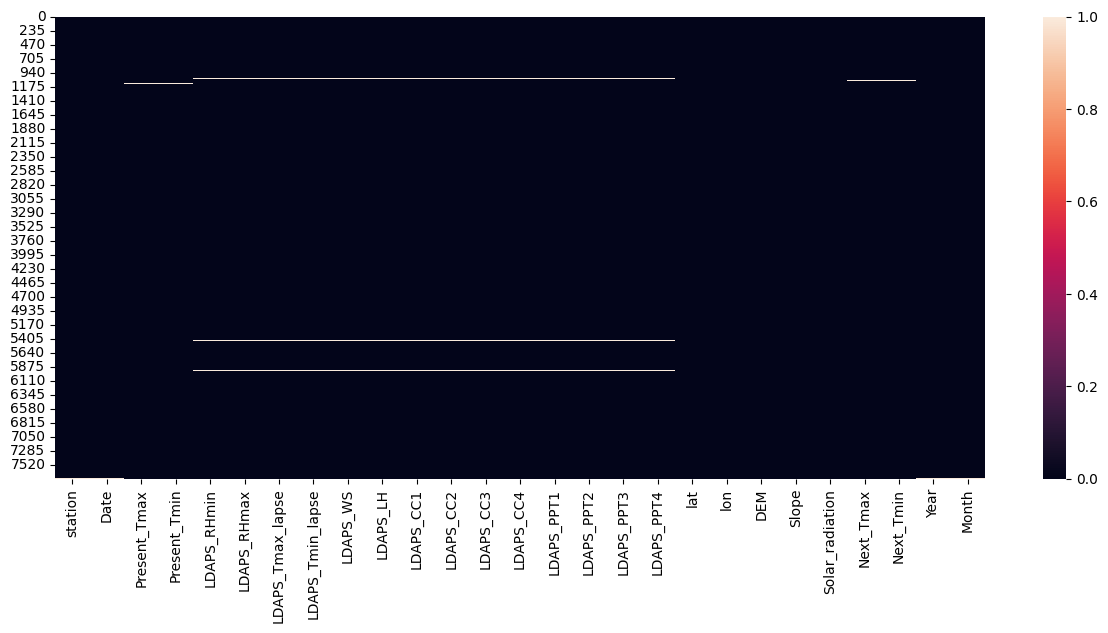

In [8]:
plt.figure(figsize=(15,6))
sns.heatmap(temp_data.isnull())

In [9]:
# Observe the individual columns
# Since we have 27 missing values in target columns "Next_Tmax" and "Next_Tmin" out of a total 7750 records, we will drop the columns

temp_data.dropna(axis=0, how='any', subset=['Next_Tmax', 'Next_Tmin'], inplace=True)

In [10]:
# Now we have 7725 records as 27 rows are dropped as mentioned earlier

temp_data.shape

(7725, 27)

In [11]:
# Since all these features are continous data I have filled missing values with the "mean" value

# Filling these continous values using mean

temp_data["Present_Tmax"] = temp_data["Present_Tmax"].fillna(temp_data["Present_Tmax"].mean())
temp_data["Present_Tmin"] = temp_data["Present_Tmin"].fillna(temp_data["Present_Tmin"].mean())
temp_data["LDAPS_RHmin"] = temp_data["LDAPS_RHmin"].fillna(temp_data["LDAPS_RHmin"].mean())
temp_data["LDAPS_RHmax"] = temp_data["LDAPS_RHmax"].fillna(temp_data["LDAPS_RHmax"].mean())
temp_data["LDAPS_Tmax_lapse"] = temp_data["LDAPS_Tmax_lapse"].fillna(temp_data["LDAPS_Tmax_lapse"].mean())
temp_data["LDAPS_Tmin_lapse"] = temp_data["LDAPS_Tmin_lapse"].fillna(temp_data["LDAPS_Tmin_lapse"].mean())
temp_data["LDAPS_WS"] = temp_data["LDAPS_WS"].fillna(temp_data["LDAPS_WS"].mean())
temp_data["LDAPS_LH"] = temp_data["LDAPS_LH"].fillna(temp_data["LDAPS_LH"].mean())
temp_data["LDAPS_CC1"] = temp_data["LDAPS_CC1"].fillna(temp_data["LDAPS_CC1"].mean())
temp_data["LDAPS_CC2"] = temp_data["LDAPS_CC2"].fillna(temp_data["LDAPS_CC2"].mean())
temp_data["LDAPS_CC3"] = temp_data["LDAPS_CC3"].fillna(temp_data["LDAPS_CC3"].mean())
temp_data["LDAPS_CC4"] = temp_data["LDAPS_CC4"].fillna(temp_data["LDAPS_CC4"].mean())
temp_data["LDAPS_PPT1"] = temp_data["LDAPS_PPT1"].fillna(temp_data["LDAPS_PPT1"].mean())
temp_data["LDAPS_PPT2"] = temp_data["LDAPS_PPT2"].fillna(temp_data["LDAPS_PPT2"].mean())
temp_data["LDAPS_PPT3"] = temp_data["LDAPS_PPT3"].fillna(temp_data["LDAPS_PPT3"].mean())
temp_data["LDAPS_PPT4"] = temp_data["LDAPS_PPT4"].fillna(temp_data["LDAPS_PPT4"].mean())

In [12]:
temp_data.isnull().sum()

station             2
Date                2
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar_radiation     0
Next_Tmax           0
Next_Tmin           0
Year                2
Month               2
dtype: int64

#### Chart - 1

### **Solar radiation as per present max temperature**

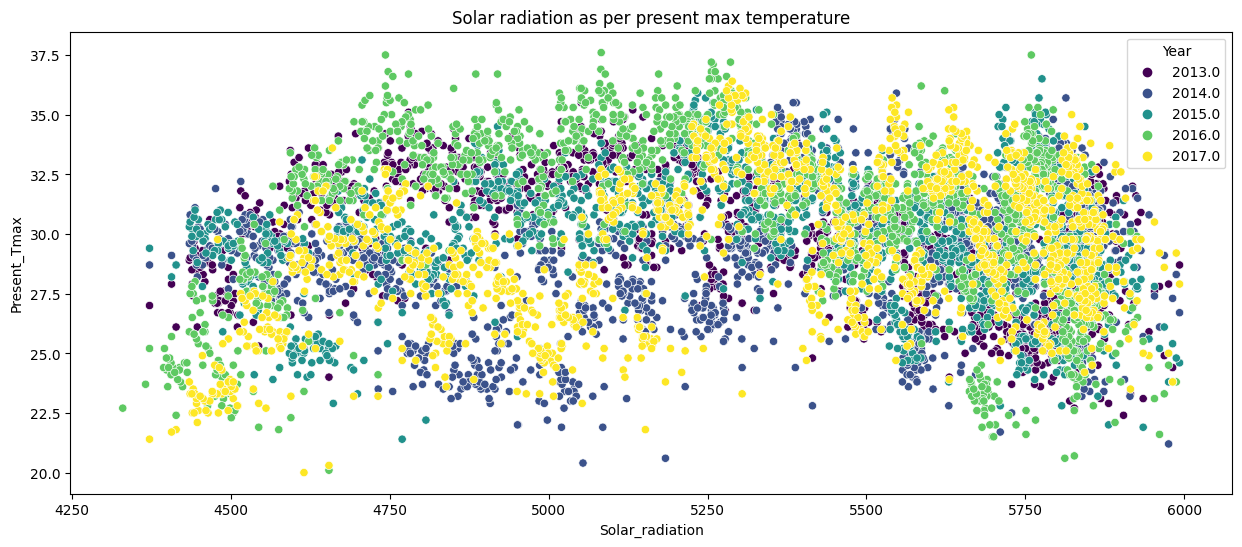

In [13]:
plt.figure(figsize=(15, 6))
sns.scatterplot(data=temp_data, x="Solar_radiation", y="Present_Tmax",
                hue="Year", palette="viridis").set(title='Solar radiation as per present max temperature')
plt.show()

**Insights from above chart:**

* A positive trend between solar radiation and present maximum temperatures. As solar radiation increases, there's a tendency for higher present maximum temperatures.
* Consistency: Some years exhibit consistent relationships between solar radiation and temperatures. Variability: Other years might showcase fluctuations or different patterns, indicating potential seasonal or climatic variations.

#### Chart - 2

### **Solar radiation as per present min temperature**

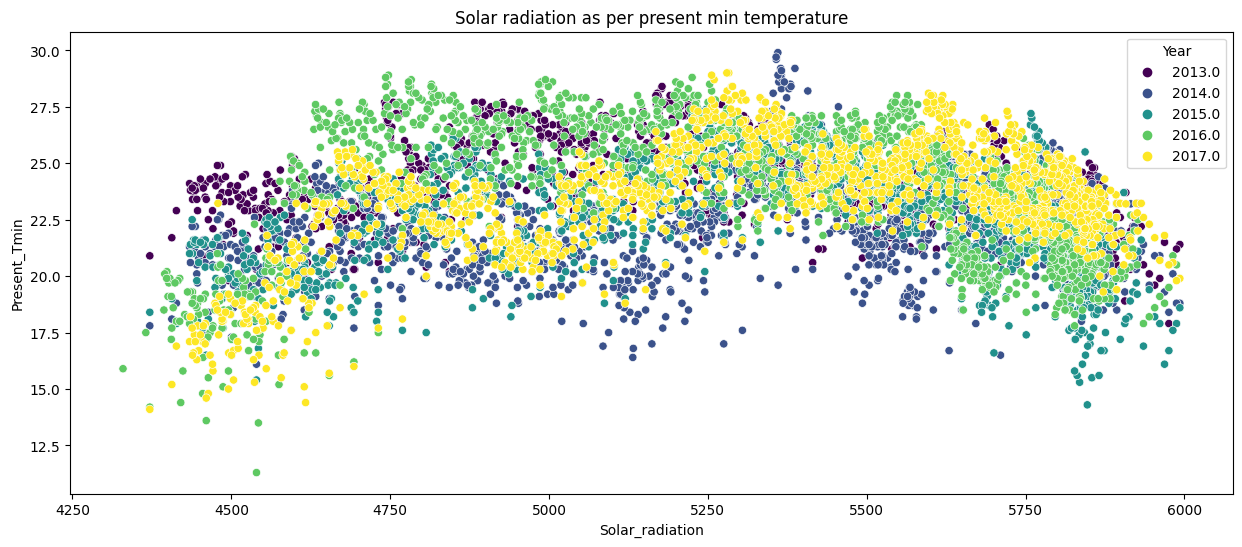

In [14]:
plt.figure(figsize=(15, 6))

sns.scatterplot(data=temp_data, x="Solar_radiation", y="Present_Tmin",
                hue="Year", palette="viridis").set(title='Solar radiation as per present min temperature')
plt.show()

**Insights from above chart:**

* Higher solar radiation corresponds to higher present minimum temperatures. This positive correlation suggests that increased solar radiation might contribute to higher minimum temperatures.
* Across the years (represented by different colors), the general trend of higher solar radiation correlating with higher present minimum temperatures appears consistent.
* The chart might exhibit seasonal variations, as certain periods could showcase a more pronounced impact of solar radiation on minimum temperatures, likely corresponding to different seasons across the years.

#### Chart - 3

### **DEM vs Slope**

In [15]:
temp_data.columns

Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar_radiation', 'Next_Tmax', 'Next_Tmin', 'Year',
       'Month'],
      dtype='object')

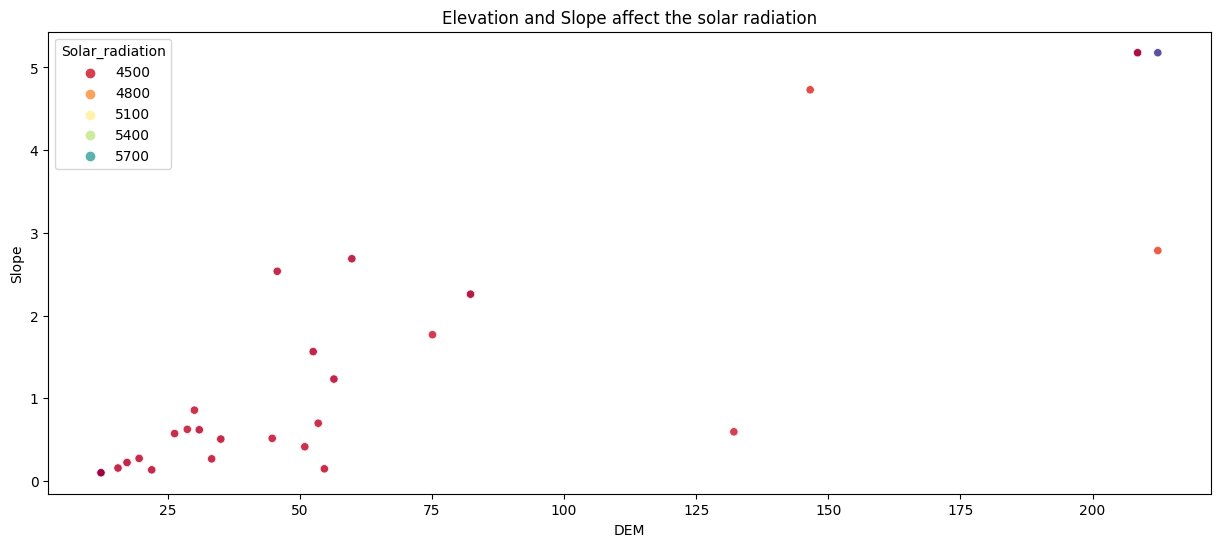

In [16]:
plt.figure(figsize=(15, 6))
sns.scatterplot(data=temp_data, x="DEM", y="Slope",
                hue="Solar_radiation", palette="Spectral").set(title='Elevation and Slope affect the solar radiation')
plt.show()

**Insights from above chart:**

* Elevation vs. Solar Radiation : Lower elevations seem to have a wider range of solar radiation values, with some higher peaks indicating varying solar exposure across different elevation levels.
* Slope vs. Solar Radiation: The plot indicates that the slope's effect on solar radiation might not be linear. There seems to be no clear linear relationship between slope and solar radiation as some areas with different slopes exhibit similar solar radiation values.
* Elevation's Impact on Solar Radiation : At different elevation levels, there's considerable variation in solar radiation. Higher elevations may not consistently experience lower solar radiation, suggesting other factors influencing solar exposure.

#### Chart - 4

### **Present_Tmin vs. LDPAS_RHmin**

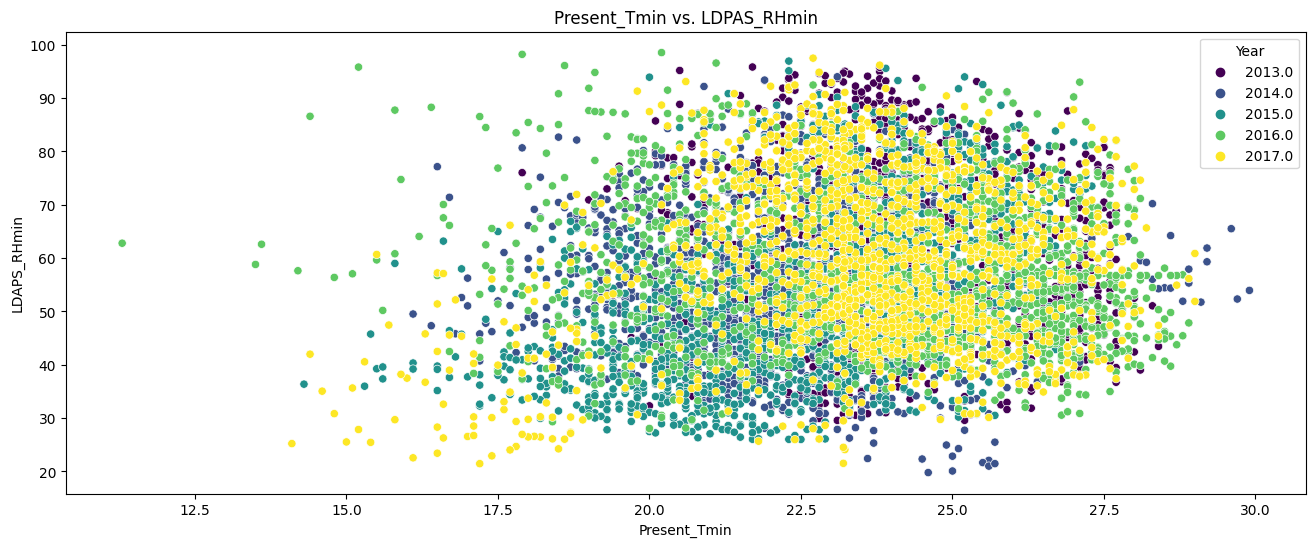

In [17]:
plt.figure(figsize=(16, 6))
sns.scatterplot(data=temp_data, x="Present_Tmin", y="LDAPS_RHmin",
                hue="Year", palette="viridis").set(title='Present_Tmin vs. LDPAS_RHmin')
plt.show()

**Insights from above chart:**

* Relation between Present_Tmin and LDAPS_RHmin: The plot showcases the relationship between present-day minimum temperature and the LDAPS model's forecast of next-day minimum relative humidity.
* The color distinction based on 'Year' allows insight into any yearly variations or consistency in the relationship between these variables across different years.

#### Chart - 5

### **Present_Tmax vs. LDPAS_RHmax**

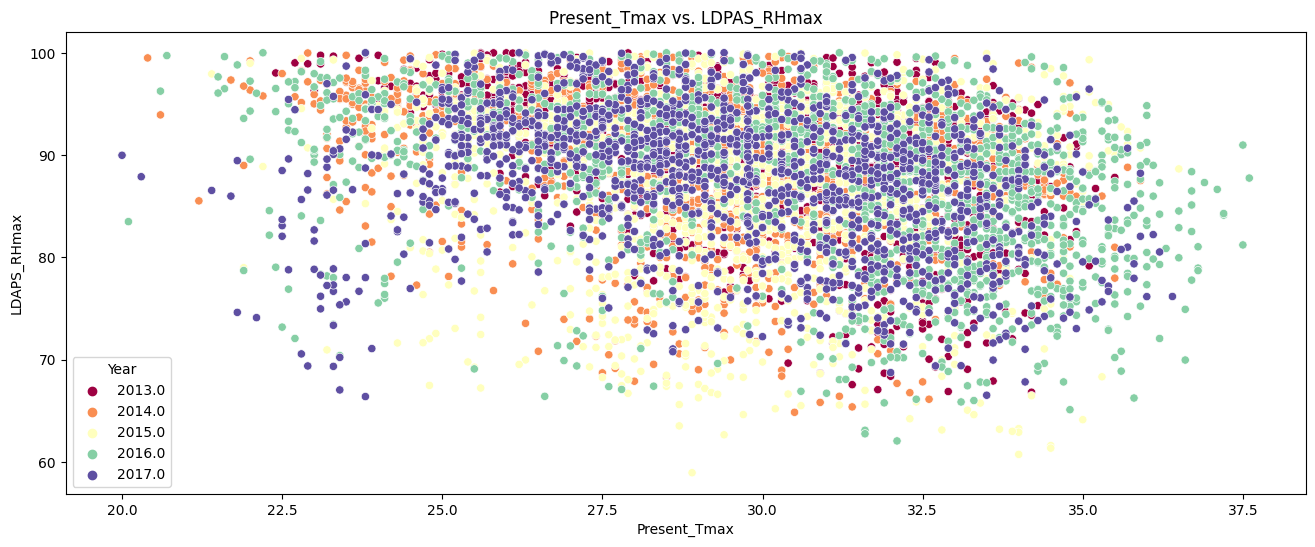

In [18]:
plt.figure(figsize=(16, 6))
sns.scatterplot(data=temp_data, x="Present_Tmax", y="LDAPS_RHmax",
                hue="Year", palette="Spectral").set(title='Present_Tmax vs. LDPAS_RHmax')
plt.show()

**Insights from above chart:**

* Present_Tmax vs. LDAPS_RHmax:There appears to be a scattered relationship between the present-day maximum air temperature and the LDAPS model's forecast of next-day maximum relative humidity.
* Most data points for "Present_Tmax" are distributed across a range of values.The forecasted values of "LDAPS_RHmax" also cover a broad spectrum, showing variability across different levels of humidity forecasts.

From the below plot we can see that "June" and "August" seem to have both relative minimum and maximum humidity. If you observe both the graphs below there is no much difference when it comes to humidty and it seems consistent across the months.Humidity is high as "July" and "August" is summer season in South Korea and also coatal areas are generally humid and this could be the reasons for increase or decrease in temperature and humidity


#### Chart - 5

### **Month's correspoding to the year with regards to minimum humidit**

<Figure size 1600x600 with 0 Axes>

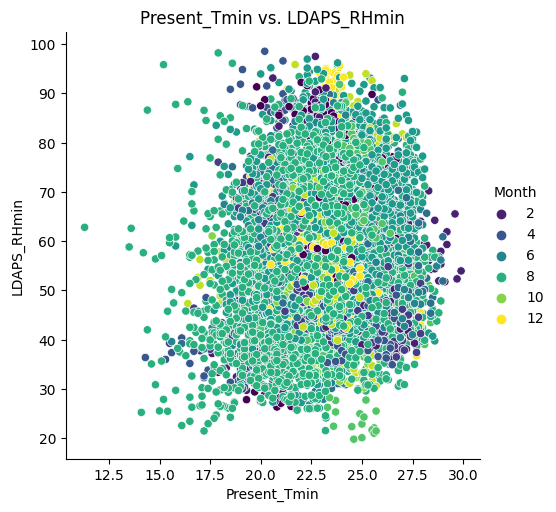

In [19]:
plt.figure(figsize=(16, 6))
sns.relplot(data=temp_data, x="Present_Tmin", y="LDAPS_RHmin",
            hue="Month", palette="viridis").set(title="Present_Tmin vs. LDAPS_RHmin")
plt.show()

**Insights from above chart:**

* There's a tendency for lower present-day minimum temperatures to coincide with higher forecasted minimum relative humidity, showcasing a negative correlation.
* Different months are represented by varying colors. This highlights seasonal patterns; however, specific trends might not be distinct due to overlapping points.

#### Chart - 5

### **Next vs. present**

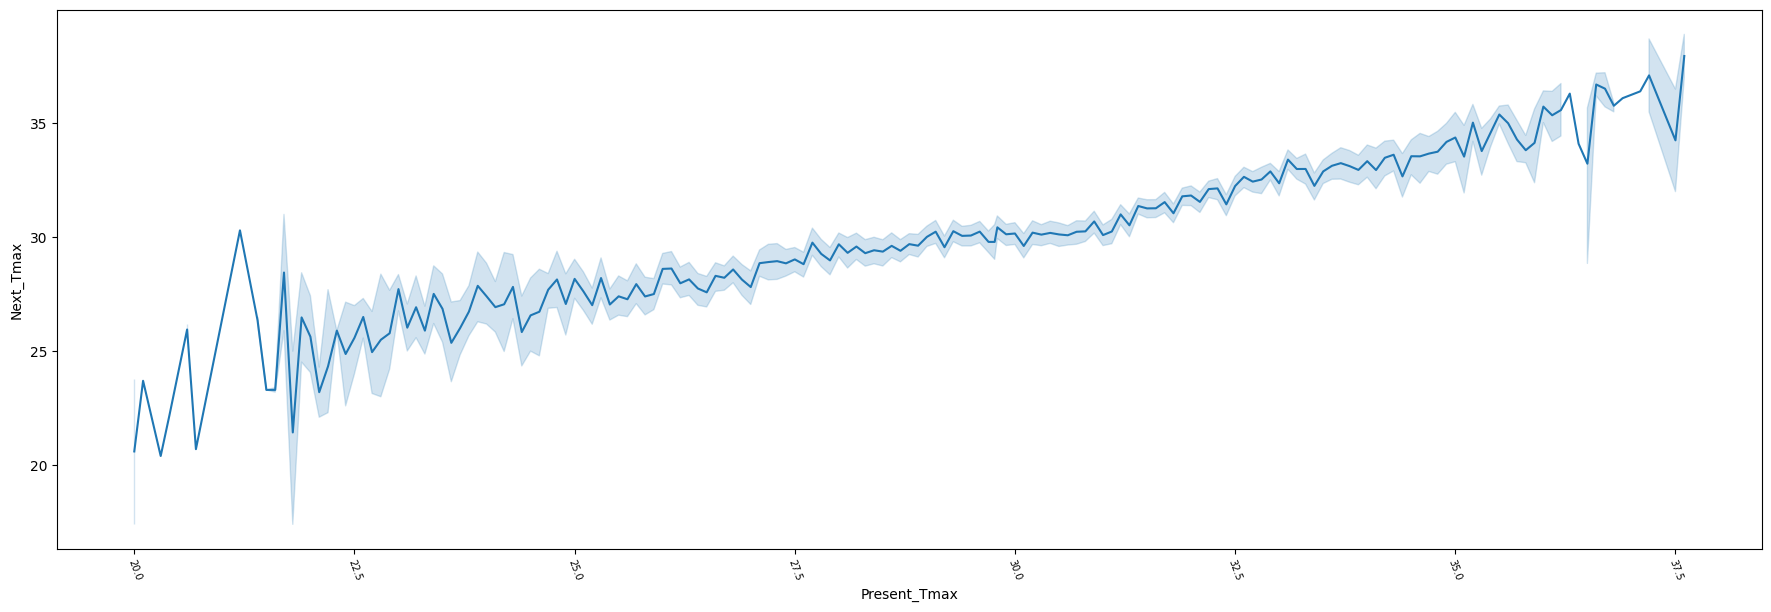

In [20]:
plt.figure(figsize = (22,7))
sns.lineplot(y="Next_Tmax", x="Present_Tmax", data = temp_data)
plt.xticks(rotation = -70, fontsize = 7)
plt.show()

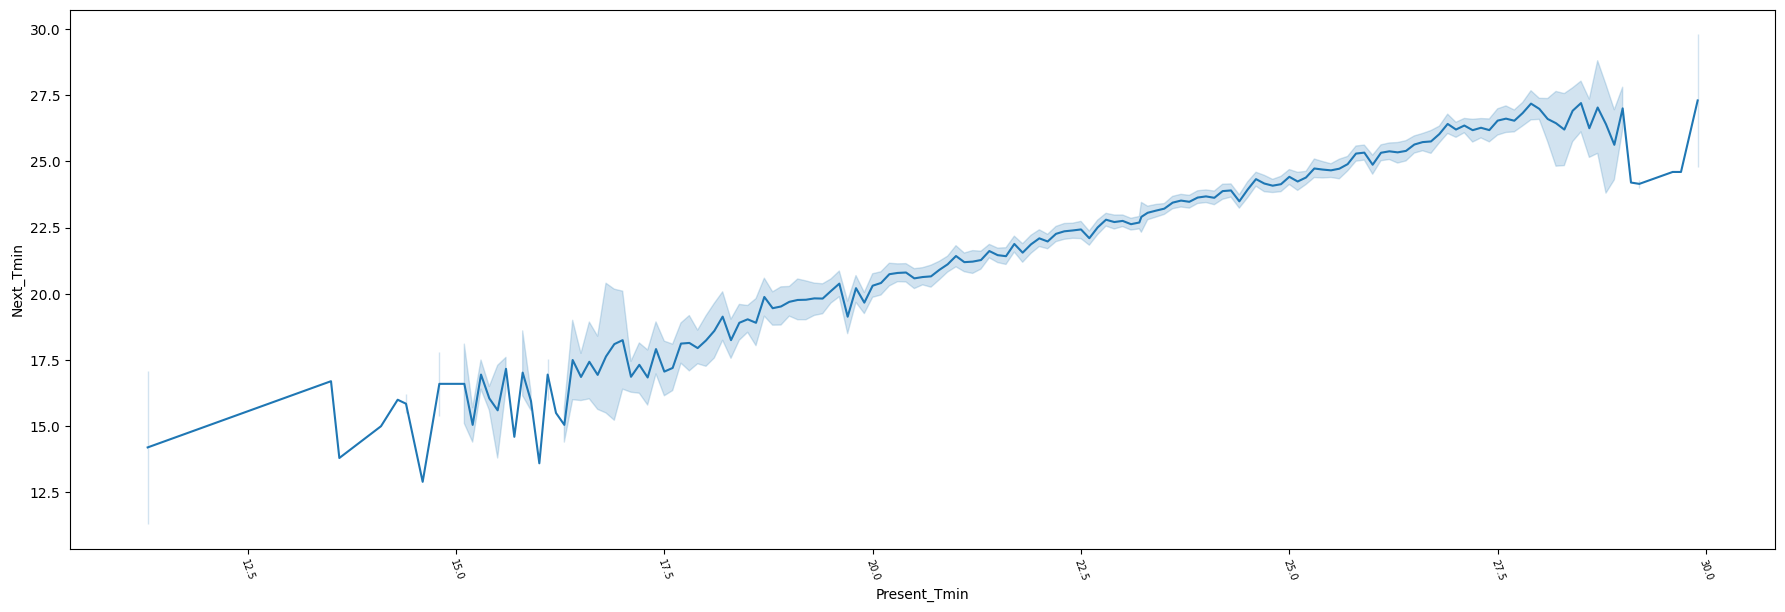

In [21]:
plt.figure(figsize = (22,7))
sns.lineplot(y="Next_Tmin", x="Present_Tmin", data = temp_data)
plt.xticks(rotation = -70, fontsize = 7)
plt.show()

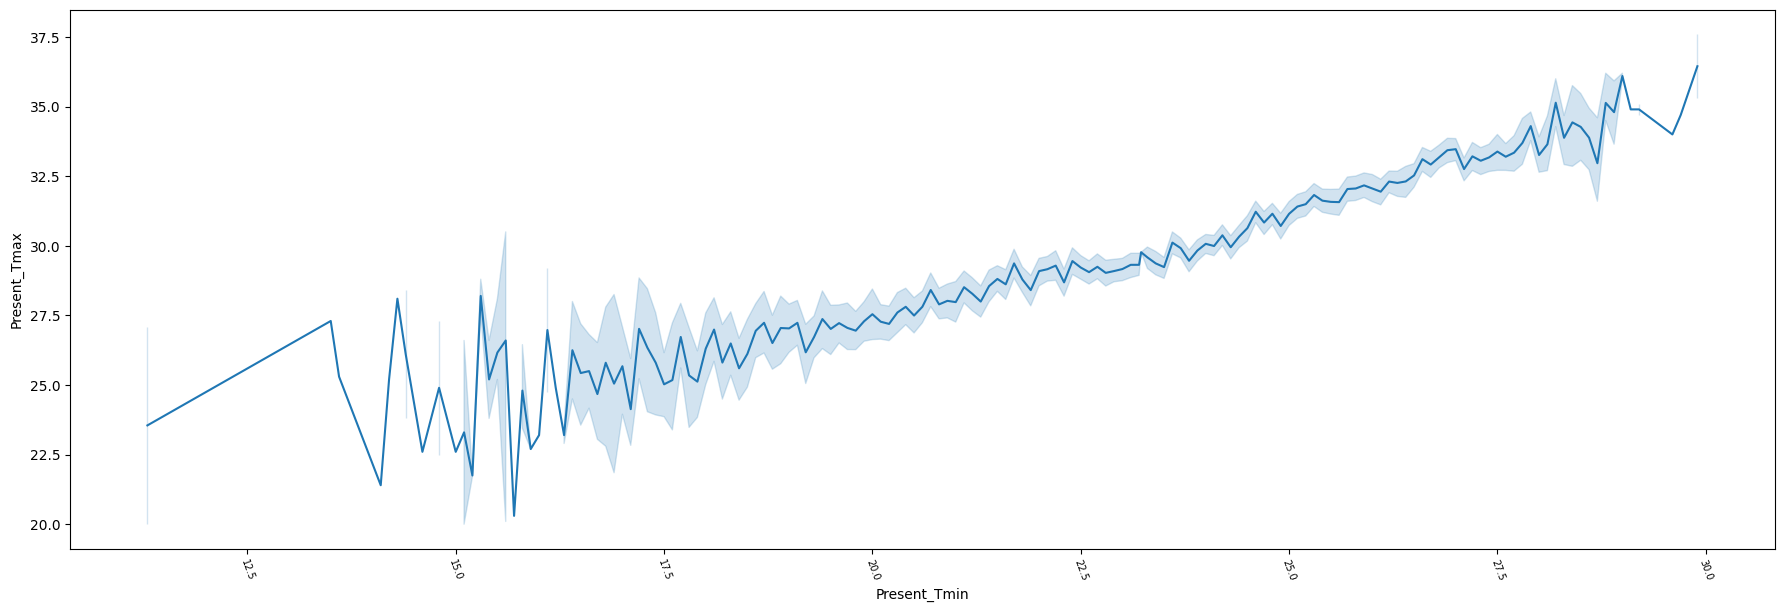

In [22]:
plt.figure(figsize = (22,7))
sns.lineplot(y="Present_Tmax", x="Present_Tmin", data = temp_data)
plt.xticks(rotation = -70, fontsize = 7)
plt.show()

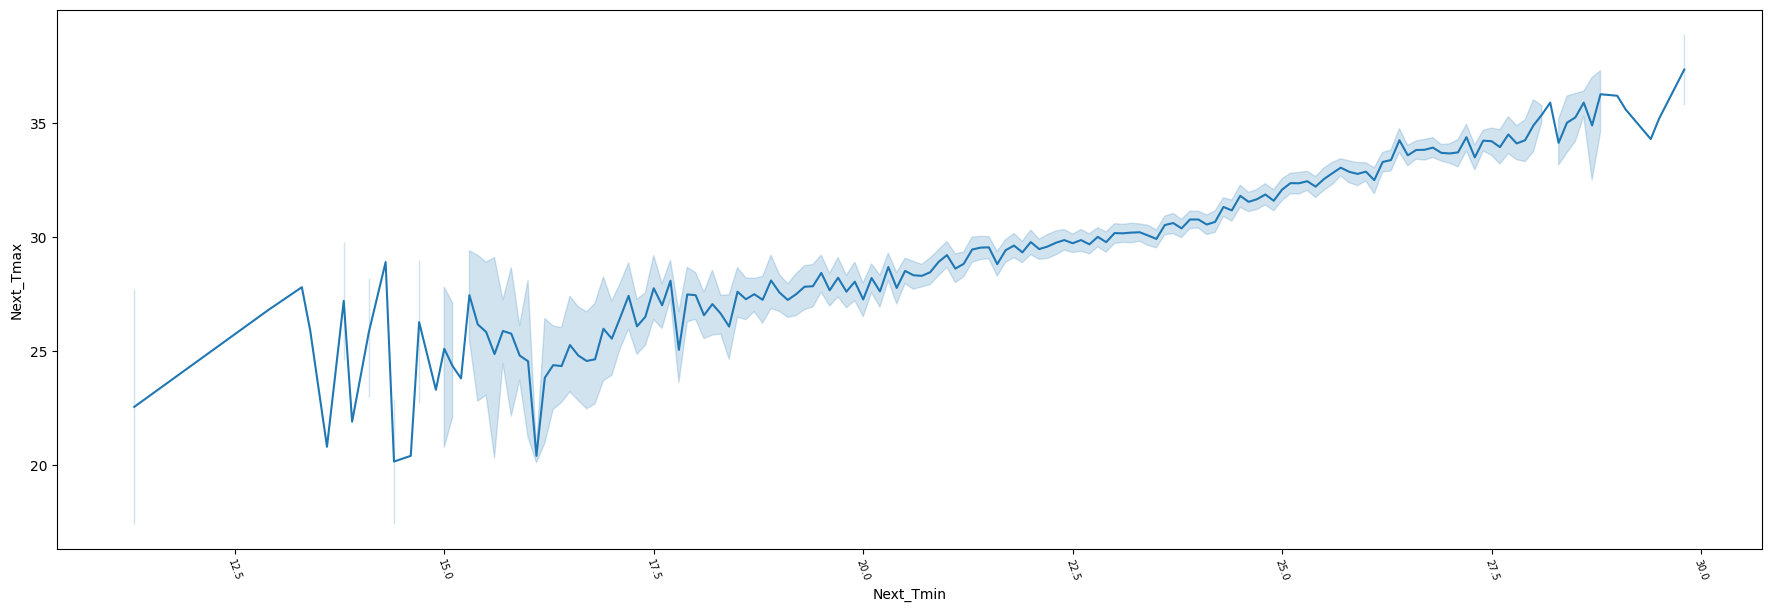

In [23]:
plt.figure(figsize = (22,7))
sns.lineplot(y="Next_Tmax", x="Next_Tmin", data = temp_data)
plt.xticks(rotation = -70, fontsize = 7)
plt.show()

## **Will check for outliers in each column using boxplot**

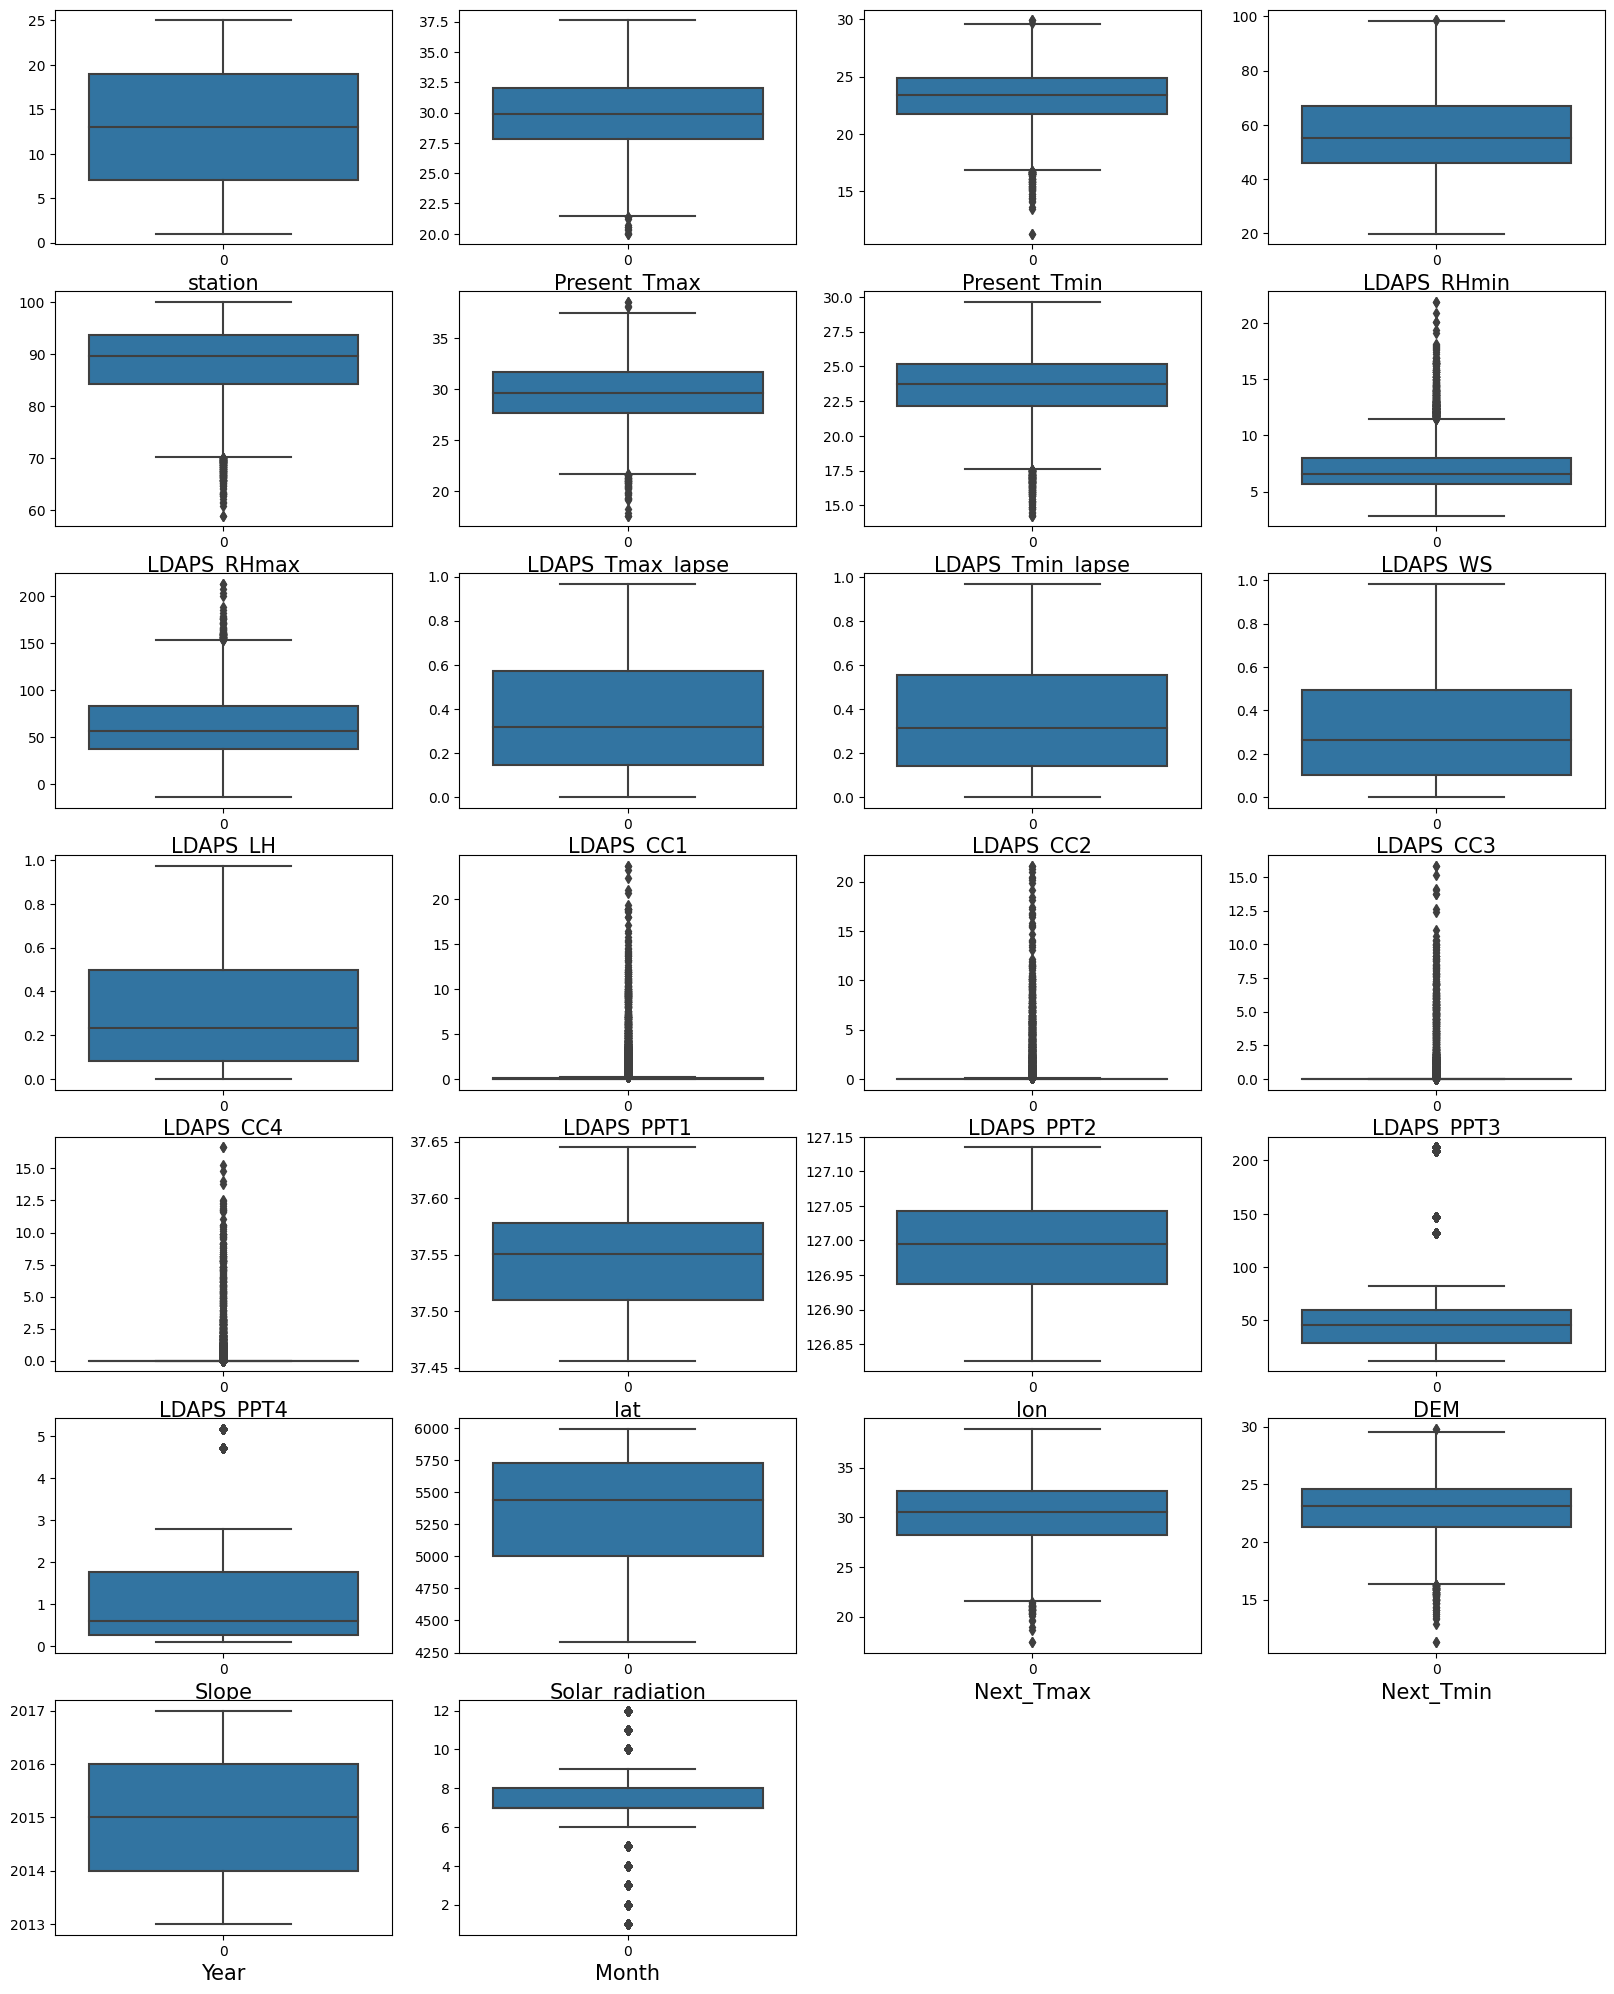

In [43]:
# Before outliers treatment

x = temp_data.drop(columns=['Date'])

plt.figure(figsize=(20,25))
graph = 1

for column in x:
  if graph<=27:
    plt.subplot(7,4,graph)
    ax=sns.boxplot(data= x[column])
    plt.xlabel(column,fontsize=15)
  graph+=1
plt.show()

In [33]:
temp_data.columns

Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar_radiation', 'Next_Tmax', 'Next_Tmin', 'Year',
       'Month'],
      dtype='object')

In [42]:
from scipy import stats

# Define a threshold for the Z-score
z_score_threshold = 2.5  # You can adjust this threshold based on your data and requirements

# Select numerical columns where you want to detect and treat outliers
numerical_cols = ['Present_Tmax', 'Present_Tmin','LDAPS_RHmax', 'LDAPS_Tmax_lapse','LDAPS_Tmin_lapse', 'LDAPS_WS',
                  'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4','DEM', 'Slope','Next_Tmax', 'Next_Tmin']

# Create a copy of the dataset for outlier treatment
no_outliers = temp_data.copy()

# Loop through each numerical column and detect and remove outliers
for col in numerical_cols:
    z_scores = stats.zscore(no_outliers[col])
    no_outliers = no_outliers[(z_scores < z_score_threshold) & (z_scores > -z_score_threshold)]

# Display the shape of the dataset after removing outliers
print("Shape of data after outlier removal:", no_outliers.shape)

Shape of data after outlier removal: (5545, 27)


KeyError: ignored

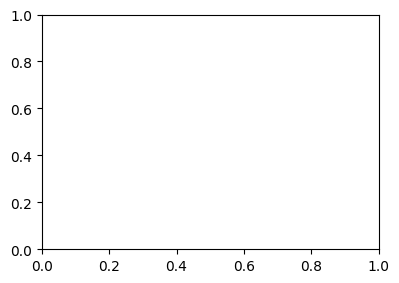

In [46]:
# After outliers treatment

x = no_outliers.drop(columns=['Date'])

plt.figure(figsize=(20,25))
graph = 1

for column in no_outliers:
  if graph<=27:
    plt.subplot(7,4,graph)
    ax=sns.boxplot(data= no_outliers[column])
    plt.xlabel(column,fontsize=15)
  graph+=1
plt.show()

# Firstly will predict for Next_Tmax

### ML Model - 1

#### Using all Variables for ML Model-1

In [50]:
# will import necessary libraries for ML model

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import Ridge
import math

Mean Squared Error for first ML model-1 is: 1.9007673985780924
Mean Absolute Error for first ML model-1 is: 1.0461280369717807
Root Mean Squared Error for first ML model-1 is: 1.3786832118286247
Regression Score on train set of ML Model-1 is 0.7649709939626291
Regression Score on test set of ML Model-1 is: 0.7559307785980441


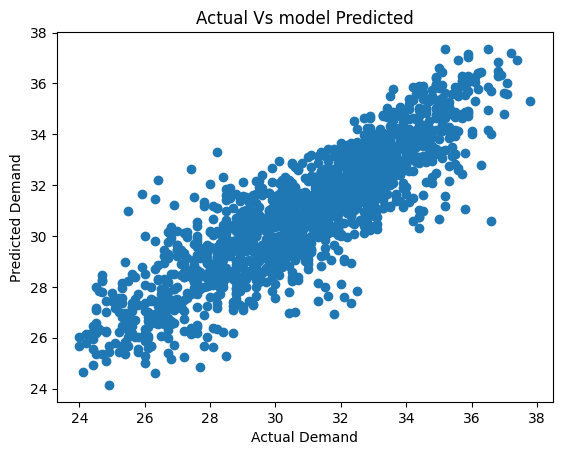

In [54]:
# Idenntify for dependent Variable (y) and independent variables (x).

# Will assign x for dependent Variables and y for idependent Variables
x = no_outliers.drop(columns=['Next_Tmax','Date'])

y = no_outliers['Next_Tmax']

# splitting data into train and test set.

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=0)

(x_train.shape)
(x_test.shape)
(y_train.shape)
(y_test.shape)

# Transforming data standardization

scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

# Fitting linear regressio to training set

regressor = LinearRegression()

regressor.fit(x_train,y_train)

regressor.intercept_

regressor.coef_

# will predict on x_train

y_pred_train = regressor.predict(x_train)

y_pred_train

# Predicting on test set results

y_pred = regressor.predict(x_test)

y_pred

# We already have actual bike rented count in y_test

# After prediction on test and train dataset. Will check with Evalution Metrics.

MSE = mean_squared_error(y_test,y_pred)
MAE = mean_absolute_error(y_test,y_pred)
RMSE = math.sqrt(mean_squared_error(y_test,y_pred))
r2score_train = r2_score(y_train,y_pred_train)
r2score_test = r2_score(y_test,y_pred)
train_score = regressor.score(x_train,y_train)
test_score = regressor.score(x_test,y_test)


print('Mean Squared Error for first ML model-1 is:', MSE)

print('Mean Absolute Error for first ML model-1 is:', MAE)

print('Root Mean Squared Error for first ML model-1 is:', RMSE)

print('Regression Score on train set of ML Model-1 is', r2score_train)

print('Regression Score on test set of ML Model-1 is:', r2score_test)

# Plot for Actual Vs model Predicted
plt.scatter(y_test,y_pred)
plt.xlabel('Actual Demand')
plt.ylabel('Predicted Demand')
plt.title('Actual Vs model Predicted')
plt.show()

In [53]:
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV

lasscv =LassoCV(alphas=None, max_iter=10)
lasscv.fit(x_train,y_train)

# For Best alpha parameter,alpha value gives us learning rate for our model.

alpha =lasscv.alpha_

# First will impliment for Lasso Regression

lasso_reg = Lasso(alpha)

lasso_reg.fit(x_train,y_train)

# Will check for lasso Score

lasso_test=(lasso_reg.score(x_test,y_test))

print(lasso_test)

# Now will impliment for ridge regression

np.arange(0.001,0.1,0.01)

# RidgeCV will return best alpha and coefficient afer 10 cross validations.

ridgecv = RidgeCV(alphas = np.arange(0.001,0.1,0.01))

ridgecv.fit(x_train,y_train)

ridgecv.alpha_

ridge_model = Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(x_train,y_train)

ridge_test = ridge_model.score(x_test,y_test)

print(ridge_test)

print('Lasso Regression for test set of ML Model-1 is:',lasso_test)
print('Ridge Regression for test set of ML Model-1 is:',ridge_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.790596022671707, tolerance: 2.3708971018041245
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.689313098537241, tolerance: 2.3708971018041245
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.527675089422701, tolerance: 2.3708971018041245
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: Convergence

0.756206093527467
0.7560417866592685
Lasso Regression for test set of ML Model-1 is: 0.756206093527467
Ridge Regression for test set of ML Model-1 is: 0.7560417866592685


**Insigts from the ML Model 1 :**

**Before tuning**

Mean Squared Error (MSE): 1.9007

Mean Absolute Error (MAE): 1.0461

Root Mean Squared Error (RMSE): 1.3787

Insights: These errors indicate moderate accuracy. The model's predictions on average are off by around 1.3 units, varying between 1 and 1.9 units.
Regression Score on Train Set: 0.765

Insights: The model explains about 76.5% of the variance in the training data.
Regression Score on Test Set: 0.756

Insights: There's slight performance drop from train to test set, suggesting a bit of overfitting but still a decent generalization capability.
Lasso and Ridge Regression Scores on Test Set:

Both Lasso and Ridge regression, when applied to the test set, offer similar performance around 0.7562 and 0.7560, respectively. These regularization techniques didn't significantly enhance model performance.


**After Hyperparameter**

Moderate Performance: The model shows moderate performance in predicting the target variable.

Slight Overfitting: The drop in R-squared from train to test set indicates mild overfitting, but the model still generalizes reasonably well.

Lasso and Ridge Regularization: The attempts to address overfitting through Lasso and Ridge regression didn't notably improve the model's performanc



### ML Model - 2

#### Decision Tree

(3881, 25)
(1664, 25)
(3881,)
(1664,)
Mean Squared Error decision tree model: 2.236640625
Mean Absolute Error decision tree model: 1.0391225961538462
Root Mean Squared Error decision tree model: 1.4955402451956952
Regression Score on train set of decision tree model 1.0
Regression Score on test set of decision tree model: 0.7128027678146722


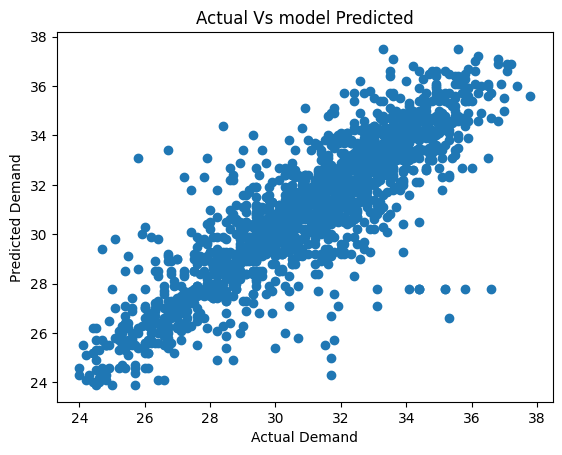

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.790596022671707, tolerance: 2.3708971018041245
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.689313098537241, tolerance: 2.3708971018041245
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.527675089422701, tolerance: 2.3708971018041245
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: Convergence

0.756206093527467
0.7560417866592685
Lasso Regression for test set of decision tree model is: 0.756206093527467
Ridge Regression for test set of decision tree model is: 0.7560417866592685


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.61781815136419, tolerance: 2.3202005623188415
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.532959352285616, tolerance: 2.3202005623188415
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.4535179759459425, tolerance: 2.3202005623188415
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: Convergence

In [55]:
# Will assign x for dependent Variables and y for idependent Variables

x = no_outliers.drop(columns=['Next_Tmax','Date'])

y = no_outliers['Next_Tmax']

# splitting data into train and test set.

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=0)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

# Transforming data standardization

scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

# import library and Fit a Decision Tree model

from sklearn.tree import DecisionTreeRegressor

decision_tree = DecisionTreeRegressor()
decision_tree.fit(x_train, y_train)

# Make predictions on the training data
y_pred_train = decision_tree.predict(x_train)

# Make predictions on the test data
y_pred = decision_tree.predict(x_test)


MSE = mean_squared_error(y_test,y_pred)
MAE = mean_absolute_error(y_test,y_pred)
RMSE = math.sqrt(mean_squared_error(y_test,y_pred))
r2score_train = r2_score(y_train,y_pred_train)
r2score_test = r2_score(y_test,y_pred)
train_score = regressor.score(x_train,y_train)
test_score = regressor.score(x_test,y_test)


print('Mean Squared Error decision tree model:', MSE)

print('Mean Absolute Error decision tree model:', MAE)

print('Root Mean Squared Error decision tree model:', RMSE)

print('Regression Score on train set of decision tree model', r2score_train)

print('Regression Score on test set of decision tree model:', r2score_test)

# Plot for Actual Vs model Predicted
plt.scatter(y_test,y_pred)
plt.xlabel('Actual Demand')
plt.ylabel('Predicted Demand')
plt.title('Actual Vs model Predicted')
plt.show()


lasscv =LassoCV(alphas=None, max_iter=10)
lasscv.fit(x_train,y_train)

# For Best alpha parameter,alpha value gives us learning rate for our model.

alpha =lasscv.alpha_

# First will impliment for Lasso Regression

lasso_reg = Lasso(alpha)

lasso_reg.fit(x_train,y_train)

# Will check for lasso Score

lasso_test=(lasso_reg.score(x_test,y_test))

print(lasso_test)

# Now will impliment for ridge regression

np.arange(0.001,0.1,0.01)

# RidgeCV will return best alpha and coefficient afer 10 cross validations.

ridgecv = RidgeCV(alphas = np.arange(0.001,0.1,0.01))

ridgecv.fit(x_train,y_train)

ridgecv.alpha_

ridge_model = Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(x_train,y_train)

ridge_test = ridge_model.score(x_test,y_test)

print(ridge_test)

print('Lasso Regression for test set of decision tree model is:',lasso_test)
print('Ridge Regression for test set of decision tree model is:',ridge_test)

**Insights from the Decisiontree Model**

* Before Hyperparameter Tuning:

  Mean Squared Error (MSE): 2.24

  Mean Absolute Error (MAE): 1.04

  Root Mean Squared Error (RMSE): 1.50


* Before Hyperparameter Tuning:
  
  Lasso Regression (Test Set): 0.76
  
  Ridge Regression (Test Set): 0.76

### ML Model - 3

#### kNN Model

(3881, 25)
(1664, 25)
(3881,)
(1664,)
Mean Squared Error kNN model: 1.5333194711538465
Mean Absolute Error kNN model: 0.9273437500000001
Root Mean Squared Error kNN model: 1.2382727773612108
Regression Score on train set of kNN model 1.0
Regression Score on test set of kNN model: 0.8031131585248501


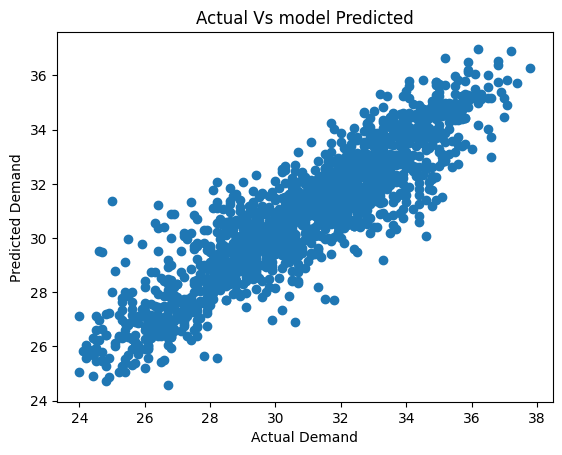

0.756206093527467
The best fit alpha value is found out to be : {'alpha': 0.1}

Using  {'alpha': 0.1}  the negative mean squared error is:  0.6567342912272975
MSE with Lasso Regression : 2.7397941967356587
RMSE with Lasso Regression : 1.6552323694078903
R2 with Lasso Regression : 0.6481950201276057
Adjusted R2 with Lasso Regression: 0.6428255912528744
The best fit alpha value is found out to be : {'alpha': 0.2}

Using  {'alpha': 0.2}  the negative mean squared error is:  0.7609333282443846
MSE with Ridge Regression : 1.8989338422879791
RMSE with Ridge Regression : 1.378018084891479
R2 with Ridge Regression : 0.7561662175352121
Adjusted R2 with Ridge Regression : 0.7524447007088264


In [56]:
from sklearn.neighbors import KNeighborsRegressor

x = no_outliers.drop(columns=['Next_Tmax','Date'])

y = no_outliers['Next_Tmax']

# splitting data into train and test set.

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=0)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

# Transforming data standardization

scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

# Fitting for a kNN Model

knn_regressor = KNeighborsRegressor(n_neighbors=5, metric='euclidean')
knn_regressor.fit(x_train, y_train)

# Make predictions on the training data
y_pred = knn_regressor.predict(x_train)

# Make predictions on the test data
y_pred = knn_regressor.predict(x_test)


MSE = mean_squared_error(y_test,y_pred)
MAE = mean_absolute_error(y_test,y_pred)
RMSE = math.sqrt(mean_squared_error(y_test,y_pred))
r2score_train = r2_score(y_train,y_pred_train)
r2score_test = r2_score(y_test,y_pred)
train_score = regressor.score(x_train,y_train)
test_score = regressor.score(x_test,y_test)


print('Mean Squared Error kNN model:', MSE)

print('Mean Absolute Error kNN model:', MAE)

print('Root Mean Squared Error kNN model:', RMSE)

print('Regression Score on train set of kNN model', r2score_train)

print('Regression Score on test set of kNN model:', r2score_test)

# Plot for Actual Vs model Predicted
plt.scatter(y_test,y_pred)
plt.xlabel('Actual Demand')
plt.ylabel('Predicted Demand')
plt.title('Actual Vs model Predicted')
plt.show()


# For Best alpha parameter,alpha value gives us learning rate for our model.

alpha =lasscv.alpha_

# First will impliment for Lasso Regression

lasso_reg = Lasso(alpha)

lasso_reg.fit(x_train,y_train)

# Will check for lasso Score

lasso_test=(lasso_reg.score(x_test,y_test))

print(lasso_test)

# Cross- Validation & Hyperparameter Tuning implimentatiion for Lasso Regression

# Cross-Validation

from sklearn.model_selection import GridSearchCV

lasso_reg = Lasso(alpha)
parameters = {'alpha': [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,2,3,4,5,6,7,8,9,10,20,30,40,45,50,55,60,100,200,300,400]}
lasso_regressor = GridSearchCV(lasso_reg, parameters,cv=10)
lasso_regressor.fit(x_train, y_train)

print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

y_pred_lasso = lasso_regressor.predict(x_test)

MSE  = mean_squared_error(y_test,y_pred_lasso)
print("MSE with Lasso Regression :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE with Lasso Regression :" ,RMSE)

r2 = r2_score(y_test,y_pred_lasso)
print("R2 with Lasso Regression :" ,r2)

adjusted_r2 = 1 - (1 - r2_score(y_test, y_pred_lasso)) * ((x_test.shape[0] - 1) / (x_test.shape[0] - x_test.shape[1] - 1))
print('Adjusted R2 with Lasso Regression:',adjusted_r2)

# For ridge Regression

ridge = Ridge()
parameters = {'alpha': [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,2,3,4,5,6,7,8,9,10,20,30,40,45,50,55,60,100,200,300,400]}
ridge_regressor = GridSearchCV(ridge, parameters,cv=3)
ridge_regressor.fit(x_train,y_train)

print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

# Model Prediction

y_pred_ridge = ridge_regressor.predict(x_test)

MSE  = mean_squared_error(y_test,y_pred_ridge)
print("MSE with Ridge Regression :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE with Ridge Regression :" ,RMSE)

r2 = r2_score(y_test,y_pred_ridge)
print("R2 with Ridge Regression :" ,r2)

adjusted_r2 = 1 - (1 - r2_score(y_test, y_pred_ridge)) * ((x_test.shape[0] - 1) / (x_test.shape[0] - x_test.shape[1] - 1))
print('Adjusted R2 with Ridge Regression :',adjusted_r2)

**Insights from kNN Model:**

* Before Hyperparameter Tuning:

   Mean Squared Error (MSE): 1.5333

   Mean Absolute Error (MAE): 0.9273

   Root Mean Squared Error (RMSE): 1.2383

   R-squared (R2) - Train: 1.0 (Perfect fit - potential overfitting)

   R2 - Test: 0.8031

* Lasso Regression:

  After Hyperparameter Tuning (with alpha=0.1):

  MSE: 2.7398 (Higher than kNN)

  RMSE: 1.6552

  R2: 0.6482

  Adjusted R2: 0.6428


**Before tuning, kNN showcased good predictive ability on the test set but with a risk of overfitting due to a perfect fit on the training set.Lasso and Ridge Regression, after tuning, showed better generalization capabilities than kNN, with Ridge Regression slightly outperforming Lasso in terms of R2 and MSE.**


# Now, predicting for Next_Tmin

### ML Model - 1

#### Using all Variables for ML Model-1

In [ ]:
# will import necessary libraries for ML model

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import Ridge
import math

Mean Squared Error for first ML model-1 is: 0.8749606992521148
Mean Absolute Error for first ML model-1 is: 0.7447798697299416
Root Mean Squared Error for first ML model-1 is: 0.9353933393242198
Regression Score on train set of ML Model-1 is 0.8174461825066409
Regression Score on test set of ML Model-1 is: 0.8162231000479295


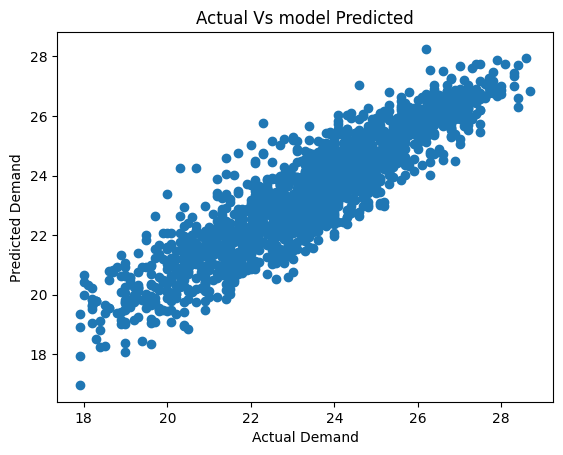

In [57]:
# Idenntify for dependent Variable (y) and independent variables (x).

# Will assign x for dependent Variables and y for idependent Variables
x = no_outliers.drop(columns=['Next_Tmin','Date'])

y = no_outliers['Next_Tmin']

# splitting data into train and test set.

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=0)

(x_train.shape)
(x_test.shape)
(y_train.shape)
(y_test.shape)

# Transforming data standardization

scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

# Fitting linear regressio to training set

regressor = LinearRegression()

regressor.fit(x_train,y_train)

regressor.intercept_

regressor.coef_

# will predict on x_train

y_pred_train = regressor.predict(x_train)

y_pred_train

# Predicting on test set results

y_pred = regressor.predict(x_test)

y_pred

# We already have actual bike rented count in y_test

# After prediction on test and train dataset. Will check with Evalution Metrics.

MSE = mean_squared_error(y_test,y_pred)
MAE = mean_absolute_error(y_test,y_pred)
RMSE = math.sqrt(mean_squared_error(y_test,y_pred))
r2score_train = r2_score(y_train,y_pred_train)
r2score_test = r2_score(y_test,y_pred)
train_score = regressor.score(x_train,y_train)
test_score = regressor.score(x_test,y_test)


print('Mean Squared Error for first ML model-1 is:', MSE)

print('Mean Absolute Error for first ML model-1 is:', MAE)

print('Root Mean Squared Error for first ML model-1 is:', RMSE)

print('Regression Score on train set of ML Model-1 is', r2score_train)

print('Regression Score on test set of ML Model-1 is:', r2score_test)

# Plot for Actual Vs model Predicted
plt.scatter(y_test,y_pred)
plt.xlabel('Actual Demand')
plt.ylabel('Predicted Demand')
plt.title('Actual Vs model Predicted')
plt.show()

**insights from ML Model 1:**

* Before Hyperparameter Tuning:
  Evaluation Metrics (Model-1):

  Mean Squared Error (MSE): 0.875

  Mean Absolute Error (MAE): 0.745

  Root Mean Squared Error (RMSE): 0.935

  Regression Score (R2) on Train Set: 0.817

  Regression Score (R2) on Test Set: 0.816

### ML Model - 2

#### Decision Tree

(3881, 25)
(1664, 25)
(3881,)
(1664,)
Mean Squared Error decision tree model: 1.1764963942307693
Mean Absolute Error decision tree model: 0.7920072115384618
Root Mean Squared Error decision tree model: 1.084664185004174
Regression Score on train set of decision tree model 1.0
Regression Score on test set of decision tree model: 0.7528884893672014


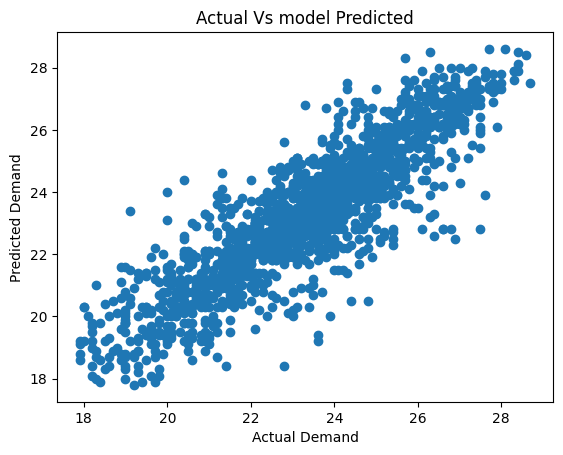

0.8163693911334431
0.8162148084039254
Lasso Regression for test set of decision tree model is: 0.8163693911334431
Ridge Regression for test set of decision tree model is: 0.8162148084039254


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.543e+03, tolerance: 1.825e+00
  model = cd_fast.enet_coordinate_descent(


In [58]:
# Will assign x for dependent Variables and y for idependent Variables

x = no_outliers.drop(columns=['Next_Tmin','Date'])

y = no_outliers['Next_Tmin']

# splitting data into train and test set.

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=0)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

# Transforming data standardization

scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

# import library and Fit a Decision Tree model

from sklearn.tree import DecisionTreeRegressor

decision_tree = DecisionTreeRegressor()
decision_tree.fit(x_train, y_train)

# Make predictions on the training data
y_pred_train = decision_tree.predict(x_train)

# Make predictions on the test data
y_pred = decision_tree.predict(x_test)


MSE = mean_squared_error(y_test,y_pred)
MAE = mean_absolute_error(y_test,y_pred)
RMSE = math.sqrt(mean_squared_error(y_test,y_pred))
r2score_train = r2_score(y_train,y_pred_train)
r2score_test = r2_score(y_test,y_pred)
train_score = regressor.score(x_train,y_train)
test_score = regressor.score(x_test,y_test)


print('Mean Squared Error decision tree model:', MSE)

print('Mean Absolute Error decision tree model:', MAE)

print('Root Mean Squared Error decision tree model:', RMSE)

print('Regression Score on train set of decision tree model', r2score_train)

print('Regression Score on test set of decision tree model:', r2score_test)

# Plot for Actual Vs model Predicted
plt.scatter(y_test,y_pred)
plt.xlabel('Actual Demand')
plt.ylabel('Predicted Demand')
plt.title('Actual Vs model Predicted')
plt.show()


lasscv =LassoCV(alphas=None, max_iter=10)
lasscv.fit(x_train,y_train)

# For Best alpha parameter,alpha value gives us learning rate for our model.

alpha =lasscv.alpha_

# First will impliment for Lasso Regression

lasso_reg = Lasso(alpha)

lasso_reg.fit(x_train,y_train)

# Will check for lasso Score

lasso_test=(lasso_reg.score(x_test,y_test))

print(lasso_test)

# Now will impliment for ridge regression

np.arange(0.001,0.1,0.01)

# RidgeCV will return best alpha and coefficient afer 10 cross validations.

ridgecv = RidgeCV(alphas = np.arange(0.001,0.1,0.01))

ridgecv.fit(x_train,y_train)

ridgecv.alpha_

ridge_model = Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(x_train,y_train)

ridge_test = ridge_model.score(x_test,y_test)

print(ridge_test)

print('Lasso Regression for test set of decision tree model is:',lasso_test)
print('Ridge Regression for test set of decision tree model is:',ridge_test)

**Insights from Decision Model:**

* Before Hyperparameter Tuning:

 Mean Squared Error (MSE): 1.18

 Mean Absolute Error (MAE): 0.79

 Root Mean Squared Error (RMSE): 1.08

 Regression Score (R2) - Train Set: Perfect score of 1.0

 Regression Score (R2) - Test Set: 0.75

* After Hyperparameter Tuning

  Lasso Regression R2 Score on Test Set: 0.82

  Ridge Regression R2 Score on Test Set: 0.8

### ML Model - 3

#### kNN Model

(3881, 25)
(1664, 25)
(3881,)
(1664,)
Mean Squared Error kNN model: 0.8382377403846153
Mean Absolute Error kNN model: 0.7008052884615387
Root Mean Squared Error kNN model: 0.9155532427907267
Regression Score on train set of kNN model 1.0
Regression Score on test set of kNN model: 0.823936396820579


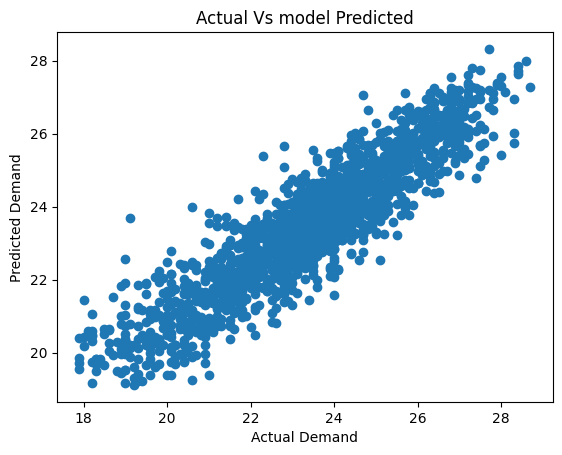

0.8163693911334431
The best fit alpha value is found out to be : {'alpha': 0.1}

Using  {'alpha': 0.1}  the negative mean squared error is:  0.6970109698337253
MSE with Lasso Regression : 1.4674873964090407
RMSE with Lasso Regression : 1.2113989418886912
R2 with Lasso Regression : 0.6917686878264243
Adjusted R2 with Lasso Regression: 0.6870643027199901
The best fit alpha value is found out to be : {'alpha': 0.2}

Using  {'alpha': 0.2}  the negative mean squared error is:  0.8151536203577994
MSE with Ridge Regression : 0.8750571683159334
RMSE with Ridge Regression : 0.9354449039446061
R2 with Ridge Regression : 0.8162028376687106
Adjusted R2 with Ridge Regression : 0.8133976306734223


In [59]:
from sklearn.neighbors import KNeighborsRegressor

x = no_outliers.drop(columns=['Next_Tmin','Date'])

y = no_outliers['Next_Tmin']

# splitting data into train and test set.

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=0)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

# Transforming data standardization

scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

# Fitting for a kNN Model

knn_regressor = KNeighborsRegressor(n_neighbors=5, metric='euclidean')
knn_regressor.fit(x_train, y_train)

# Make predictions on the training data
y_pred = knn_regressor.predict(x_train)

# Make predictions on the test data
y_pred = knn_regressor.predict(x_test)


MSE = mean_squared_error(y_test,y_pred)
MAE = mean_absolute_error(y_test,y_pred)
RMSE = math.sqrt(mean_squared_error(y_test,y_pred))
r2score_train = r2_score(y_train,y_pred_train)
r2score_test = r2_score(y_test,y_pred)
train_score = regressor.score(x_train,y_train)
test_score = regressor.score(x_test,y_test)


print('Mean Squared Error kNN model:', MSE)

print('Mean Absolute Error kNN model:', MAE)

print('Root Mean Squared Error kNN model:', RMSE)

print('Regression Score on train set of kNN model', r2score_train)

print('Regression Score on test set of kNN model:', r2score_test)

# Plot for Actual Vs model Predicted
plt.scatter(y_test,y_pred)
plt.xlabel('Actual Demand')
plt.ylabel('Predicted Demand')
plt.title('Actual Vs model Predicted')
plt.show()


# For Best alpha parameter,alpha value gives us learning rate for our model.

alpha =lasscv.alpha_

# First will impliment for Lasso Regression

lasso_reg = Lasso(alpha)

lasso_reg.fit(x_train,y_train)

# Will check for lasso Score

lasso_test=(lasso_reg.score(x_test,y_test))

print(lasso_test)

# Cross- Validation & Hyperparameter Tuning implimentatiion for Lasso Regression

# Cross-Validation

from sklearn.model_selection import GridSearchCV

lasso_reg = Lasso(alpha)
parameters = {'alpha': [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,2,3,4,5,6,7,8,9,10,20,30,40,45,50,55,60,100,200,300,400]}
lasso_regressor = GridSearchCV(lasso_reg, parameters,cv=10)
lasso_regressor.fit(x_train, y_train)

print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

y_pred_lasso = lasso_regressor.predict(x_test)

MSE  = mean_squared_error(y_test,y_pred_lasso)
print("MSE with Lasso Regression :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE with Lasso Regression :" ,RMSE)

r2 = r2_score(y_test,y_pred_lasso)
print("R2 with Lasso Regression :" ,r2)

adjusted_r2 = 1 - (1 - r2_score(y_test, y_pred_lasso)) * ((x_test.shape[0] - 1) / (x_test.shape[0] - x_test.shape[1] - 1))
print('Adjusted R2 with Lasso Regression:',adjusted_r2)

# For ridge Regression

ridge = Ridge()
parameters = {'alpha': [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,2,3,4,5,6,7,8,9,10,20,30,40,45,50,55,60,100,200,300,400]}
ridge_regressor = GridSearchCV(ridge, parameters,cv=3)
ridge_regressor.fit(x_train,y_train)

print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

# Model Prediction

y_pred_ridge = ridge_regressor.predict(x_test)

MSE  = mean_squared_error(y_test,y_pred_ridge)
print("MSE with Ridge Regression :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE with Ridge Regression :" ,RMSE)

r2 = r2_score(y_test,y_pred_ridge)
print("R2 with Ridge Regression :" ,r2)

adjusted_r2 = 1 - (1 - r2_score(y_test, y_pred_ridge)) * ((x_test.shape[0] - 1) / (x_test.shape[0] - x_test.shape[1] - 1))
print('Adjusted R2 with Ridge Regression :',adjusted_r2)

**Insights from kNN:**

* Before Hyperparameter Tuning:

   MSE: 0.838

   MAE: 0.701

   RMSE: 0.916

   Train Set R2: 1.0

   Test Set R2: 0.824

* After Hyperparameter Tuning:

  MSE: 0.816

Hyperparameter tuning improved the model's performance, reducing MSE and RMSE after tuning.
R2 and Adjusted R2 increased slightly, indicating a better fit post-tuning.

**The kNN model exhibited robust performance both before and after tuning, with minimal change post-tuning, showcasing its stability and effectiveness in this scenario.**

# Will save the predict model for Next_Tmax with name "Next_Tmax_model" and for Next_Tmin with "Next_Tmin_model"

In [61]:
import pickle

# Save the model to a file
with open('Next_Tmin_model.pkl', 'wb') as file:
    pickle.dump(knn_regressor, file)


# Load the saved model from file
with open('Next_Tmin_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

In [62]:
# Save the model to a file
with open('Next_Tmax_model.pkl', 'wb') as file:
    pickle.dump(ridge_model, file)


# Load the saved model from file
with open('Next_Tmax_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)